In [14]:
import pandas as pd
import numpy as  np
import matplotlib.pylab as plt
import string  

### 读入表


In [15]:
tab1 = "./hair_dryer.tsv"
print(tab1)

#reviews = pd.read_csv(tab1, sep='\t', header=0,low_memory=False)
reviews = pd.read_csv(tab1, sep='\t', low_memory=False)
reviews.columns = ['marketplace','customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 
                   'star_rating','helpful_votes', 'total_votes','vine',
                   'verified_purchase','review_headline','review_body','review_date']

./hair_dryer.tsv


In [16]:
reviews.nunique()




marketplace              1
customer_id          11348
review_id            11470
product_id             538
product_parent         473
product_title          503
product_category         1
star_rating              5
helpful_votes          111
total_votes            119
vine                     2
verified_purchase        2
review_headline       7696
review_body          11197
review_date           2307
dtype: int64

Total ratings : 11470
Total users : 11348
Users giving bulk ratings (more than 10) : 0
Bulk ratings : 8
Populations of bulk ratings : 0.06974716652136007
Populations of bulk users : 0.0


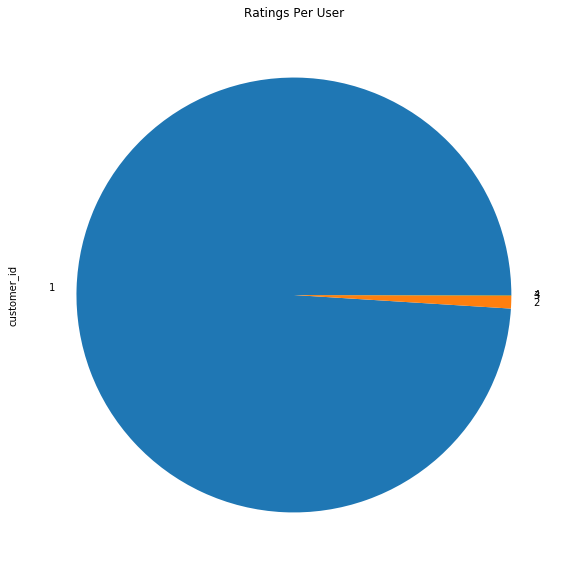

In [17]:
rating_perperson=reviews.customer_id.value_counts()
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >3]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

*** Rating distribution ***
5    6704
4    2096
1    1032
3     999
2     639
Name: star_rating, dtype: int64


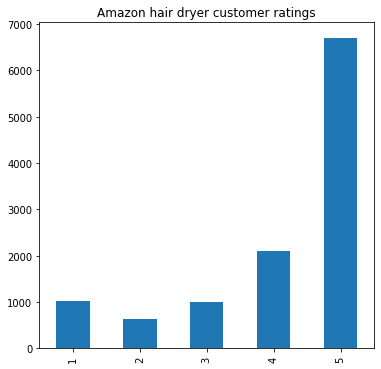

In [18]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.star_rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon hair dryer customer ratings',figsize=(6,6),style='Solarize_Light2')

### NPS

Net Promoters Score helps us evaluate customer satisfaction and loyalty
Rating 1,2,3 - Detractors
Rating 4 - Passive
Rating 5 - Promoters

In [19]:
NPS_score = round (100*((star.loc[4:5])-sum(star.loc[1:2]))/sum(star.loc[:]),2)
print (" NPS score of hair dryer is : "  + str(NPS_score))

 NPS score of hair dryer is : 4     3.71
5    43.88
Name: star_rating, dtype: float64


### 得到邀请的人数

In [20]:
reviews.vine.value_counts()

### 得到邀请和未到邀请的比较

N    11291
Y      179
Name: vine, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117ab7ba8>,
      dtype=object)

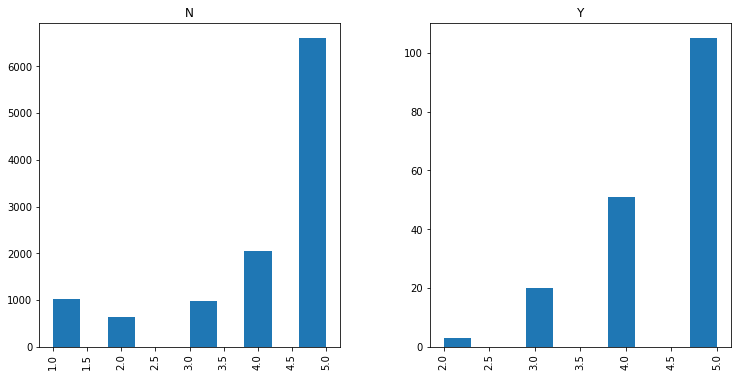

In [21]:
reviews.star_rating.hist(by=reviews.vine,figsize=(12,6))


### 确认购买的人数

In [22]:
reviews.verified_purchase.value_counts()

### 得到邀请和未到邀请的比较

Y    9811
N    1659
Name: verified_purchase, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1177757b8>,
      dtype=object)

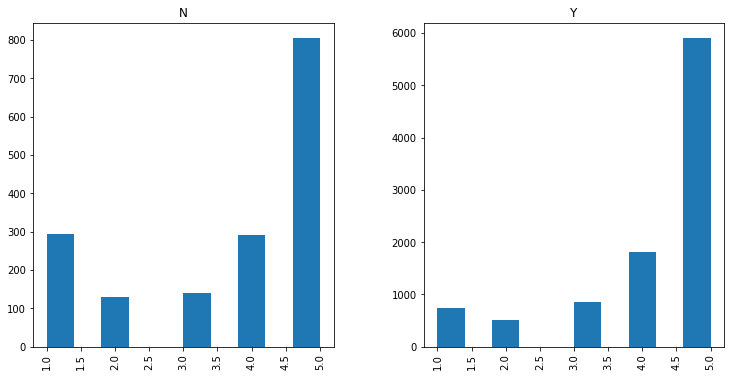

In [23]:
reviews.star_rating.hist(by=reviews.verified_purchase,figsize=(12,6))


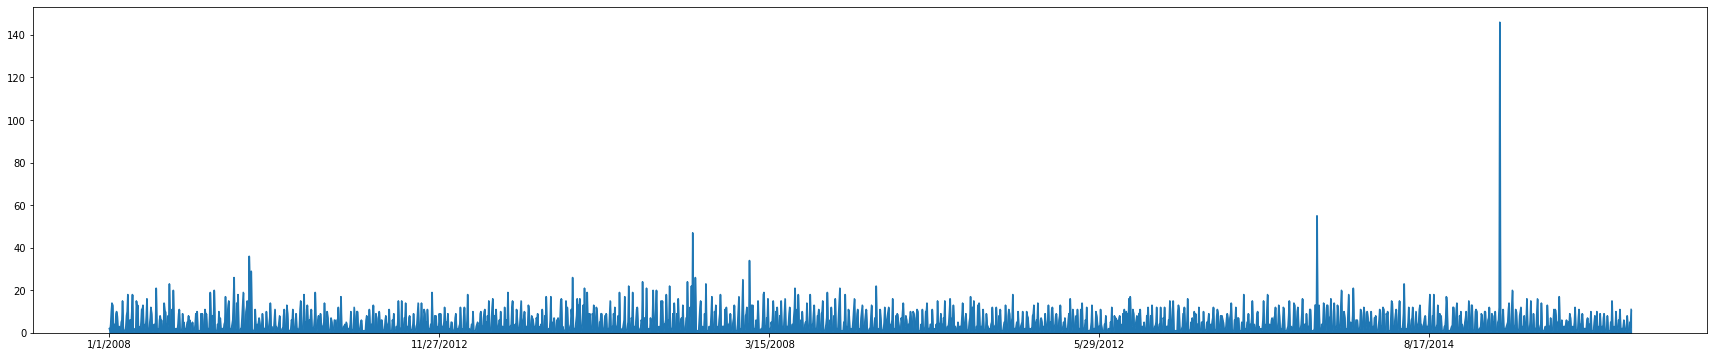

In [24]:
reviews['temp'] = reviews.review_date.apply(lambda x : pd.to_datetime(x))
review_dates = reviews.review_date.value_counts()
review_dates.sort_index(inplace=True)
review_dates.plot(kind='area',figsize=(30,6))

### 对前100数量的日期按月份统计

In [25]:
rating_perdate = review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:100]
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()


 

2     19
3     15
12    14
1     14
8      6
7      6
6      6
4      5
11     4
9      4
5      4
10     3
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1151b7860>]],
      dtype=object)

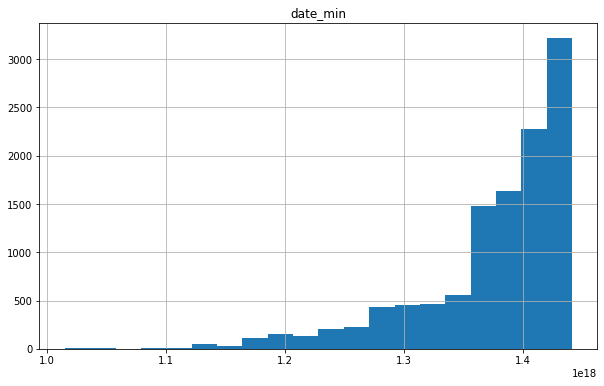

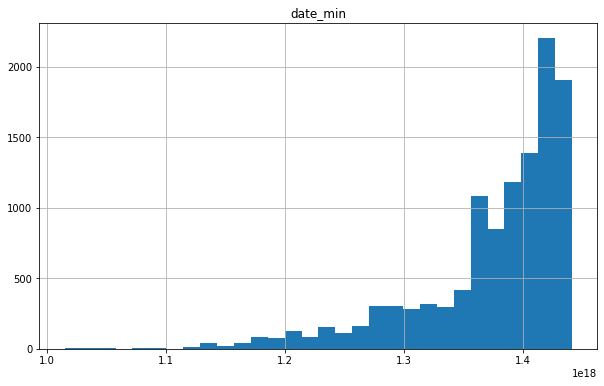

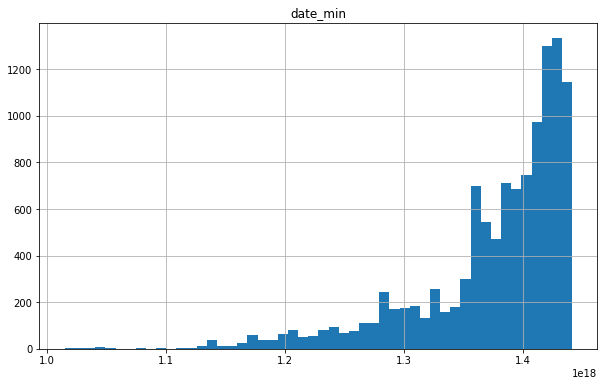

In [26]:
rating_series = pd.DataFrame(reviews.review_date)
dforms=[]
for x in rating_series.review_date:
    dforms.append((pd.to_datetime(x)).value)
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms)
rating2.reset_index(inplace=True)
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
rating2.hist(column='date_min', bins=20,figsize=(10,6),)
rating2.hist(column='date_min', bins=30,figsize=(10,6))
rating2.hist(column='date_min', bins=50,figsize=(10,6))

In [27]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)  

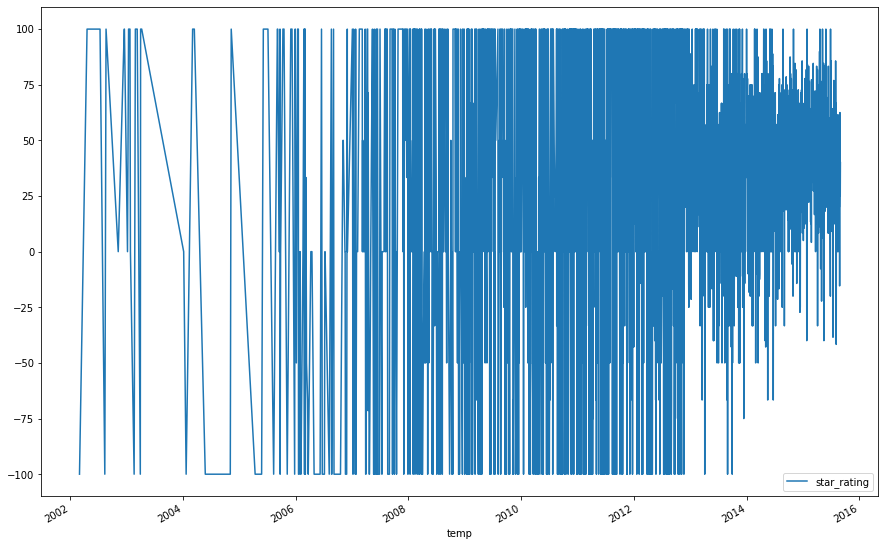

In [28]:
NPS_overtime = reviews[['temp','star_rating']]
NPS_overtime.groupby(by='temp').agg(NPS_eval).plot(figsize=(15,10))


AxesSubplot(0.125,0.125;0.775x0.755)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,star_rating
timeline,
11,-22.222222
21,-11.111111
40,-10.000000
16,3.703704
19,4.347826
...,...
74,47.667343
71,49.068323
6,50.000000


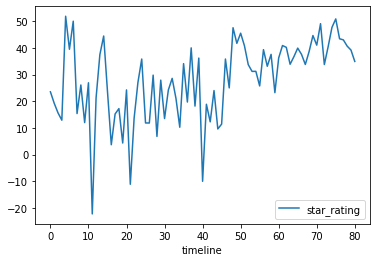

In [29]:
NPS_overtime['timeline']= NPS_overtime['temp'].apply(lambda x : (x.month+(12*(x.year-2009))))
NPS_overtime=NPS_overtime.loc[NPS_overtime['timeline']>=0]
NPS_by_month= NPS_overtime.groupby(by='timeline').agg(NPS_eval)

print(NPS_by_month.plot())
NPS_by_month.sort_values(by='star_rating')

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model

Using TensorFlow backend.


In [ ]:
dataset = NPS_by_month
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.90)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [ ]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大

#训练数据太少 look_back并不能过大

In [ ]:
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [ ]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("Test" + ".h5"))

In [ ]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [ ]:
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.show()
plt.plot(testY)
plt.plot(testPredict[1:])
plt.show()



